+ SVM으로 불린다. (SVC(분류용), SVR(회귀용))
+ 입력 데이터에서 단순한 초평면으로 정의되지 않는 더 복잡한 모델을 만들 수 있도록 확장한 것
+ 데이터셋에 비선형 특성을 추가하여 선형 모델을 강력하게 만든다.
+ 연산비용이 커질 수 있다. 

## 선형 모델과 비선형 특성

+ 저차원 데이터셋에서는 선형 모델이 매우 제한적이다. --> **특성끼리 곱하거나 거듭제곱을 하여 새로운 특성을 만들어낸다.**
+ 다음은 (특성 0 , 특성 1, 특성 1 ** 2)의 3차원 데이터 포인트로 표현한 것이다.


Text(0.5, 0, '특성1 ** 2')

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


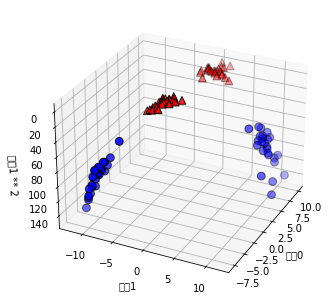

In [1]:
import mglearn
import numpy as np
from sklearn.datasets import make_blobs
X , y = make_blobs(centers = 4, random_state = 8)
y = y% 2

from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

X_new = np.hstack([X,X[:, 1:]**2]) #특성 추가
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

ax = Axes3D(figure, elev = -152, azim = -26)
mask =y ==0
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask, 2], c='b',
          cmap=mglearn.cm2, s=60, edgecolor = 'k')
ax.scatter(X_new[~mask, 0], X_new[~mask,1], X_new[~mask, 2], c='r', marker='^', cmap= mglearn.cm2, s = 60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")


C:\Users\dkstj\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0.5, 0, '특성1 ** 2')

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


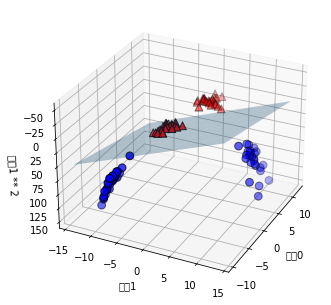

In [12]:
# 평면을 이용해 클래스 구분

linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_ #가중치와 절편

figure = plt.figure()
ax = Axes3D(figure, elev = -152, azim = -26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:,1].max() + 2 , 50)

XX, YY = np.meshgrid(xx,yy)
ZZ = (coef[0] * XX + coef[1] *YY + intercept)/ -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride = 8, cstride = 8, alpha= 0.3)
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask, 2], c= 'b', cmap=mglearn.cm2, s= 60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask,2], c='r',marker='^', cmap=mglearn.cm2, s=60, edgecolor = 'k')

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

Text(0, 0.5, '특성 1')

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


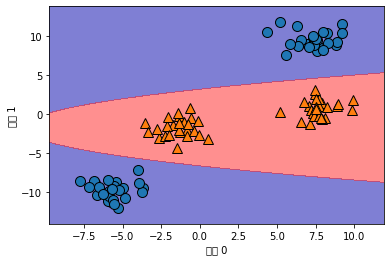

In [13]:
# 원래 모습으로 투영

ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX,YY, dec.reshape(XX.shape), levels = [dec.min(), 0, dec.max()],
            cmap = mglearn.cm2, alpha = 0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# 직선보다는 타원에 가깝다는 것을 확인 할 수 있다.


## 커널 기법

+ 데이터를 확장하지 않고 확장된 특성에 대한 데이터 포인트들의 거리를 계산한다. 
+ 새로운 특성을 많이 만ㄷ을지 않고 고차원에서 분류기를 학습할 수 있음(연산비용 축소)

**<고차원 공간에 매핑하는 방법>**
+ 원래 특성의 가능한 조합을 지정된 차수까지 모두 계산(다항식 커널)
+ RBF(가우시안 커널) : 모든 차수의 모든 다항식을 고려한다.
> but, 특성의 중요도는 고차항이 될수록 줄어든다.


## SVM 이해하기
+ 훈련 데이터 포인트가 두 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지 배우게됨
+ **서포트 벡터** : 두 클래스 사이의 경계에 위치한 데이터 포인트
+ 각 세포트 벡터와의 거리를 측정 -> 가우시안 커널 이용



Text(0, 0.5, '특성 1')

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


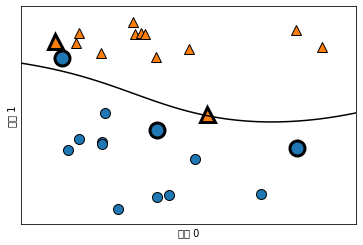

In [4]:
from sklearn.svm import SVC
X,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel = "rbf", C=10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1], y)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0], sv[:, 1], sv_labels, s= 15, markeredgewidth = 3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

#크게 그려진 도형이 서포트 벡터, 실선은 결정 경계
#결과는 결정경계가 '비선형'이다. 

## SVM 매개변수 튜닝

+ gamma : 가우시안 커널 폭의 역수(r) -> 하나의 훈련 샘플이 미치는 영향의 범위로, 작은 값은 넓은 영역, 큰 값은 제한적인 범위를 뜻한다.
+ C매개변수 : 규제 매개변수 -> dual_coef_값을 제한


C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53944 missing from c

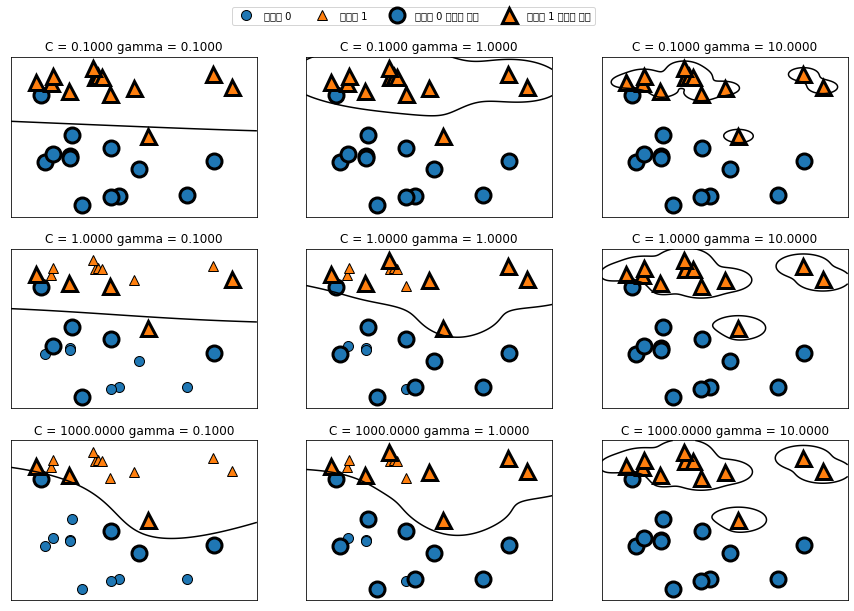

In [6]:
fig, axes = plt.subplots(3,3, figsize=(15, 10))
for ax, C in zip(axes, [-1,0,3]): #규제를 다르게함
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C = C, log_gamma = gamma, ax = a)

axes[0,0].legend(["클래스 0", "클래스 1","클래스 0 서포트 벡터","클래스 1 서포트 벡터"], ncol = 4, loc= (.9, 1.2))

+ 큰 gamma의 값은 복잡한 모델을 만듬

**<RBF 커널 SVM 유방암 데이터넷에 적용>**

In [15]:
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
svc = SVC(C= 1)
svc.fit(X_train, y_train)

print("훈련 세트 정확도 :{:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.2f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도 :0.90
테스트 세트 정확도 : 0.94


Text(0, 0.5, '특성 크기')

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from c

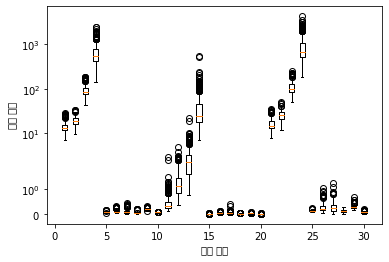

In [19]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")

> SVM은 입력 특성의 범위가 비슷해야함 --> 위 그래프에서는 특성 크기가 천차 만별임(로그스케일을 했는데도)

## SVM을 위한 데이터 전처리
+ 특성 값의 범위가 비슷해지도록 조정하는 작업
+ 평균이 0이고 단위 분산이 되도록하는 방법, 0과 1사이로 맞추는 방법 중 택
+ 후에 StandardScaler, MinMaxScaler 전처리 메서드를 사용해 처리


In [20]:
min_on_training = X_train.min(axis = 0)
range_on_training = (X_train - min_on_training).max(axis = 0)
X_train_scaled = (X_train -min_on_training)/range_on_training

print("특성별 최솟값\n", X_train_scaled.min(axis = 0))
print("특성별 최댓값\n", X_train_scaled.max(axis = 0))


특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


훈련 세트 정확도 : 0.984
테스트 세트 정확도 : 0.972


Text(0, 0.5, '특성 크기')

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from c

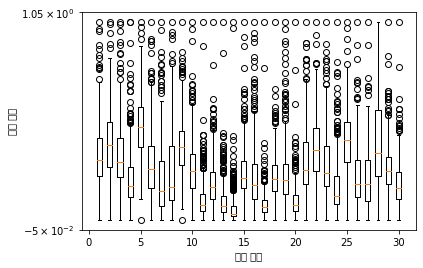

In [23]:
X_test_scaled=(X_test-min_on_training)/range_on_training
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("훈련 세트 정확도 : {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(svc.score(X_test_scaled, y_test)))

plt.boxplot(X_train_scaled, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")
#특성이 촘촘해짐

+ svm은 데이터의 특성이 몇 개 안되더라도 복잡한 결정 경계를 만들수 있음
+ 샘플이 많을 때는 잘 맞지 않음
+ 전처리 과정이 중요함